In [1]:
import os
from imp import reload
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import utils as ut

plt.set_cmap(cmap=mpl.cm.gray);
mpl.rcParams.update({'font.size': 12});
#plt.rcParams['figure.dpi'] = 150

C:\Users\helde\AppData\Local\Temp\ipykernel_18464\926342863.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


<Figure size 640x480 with 0 Axes>

# Datasets

## PMat

In [4]:
#indexes_supine = [1, 8, 9, 10, 11, 12, 15, 16, 17]
indexes_all = np.arange(1,17)

subject = 1
index = 1
fn = 'Data/PmatData/experiment-i/S{}/{}.txt'.format(subject,index)
img_csv = np.genfromtxt(fn)

# discart first 10 and last 10
img_csv = img_csv[10:-10,:]
n_frames,_ = img_csv.shape

# to get size of the read file
print(img_csv.shape)

(62, 2048)


In [5]:
frame_number = 30

img_frame, img_bin = ut.get_frame(img_csv, frame_number, dataset='PMat', mask=True, t=0)

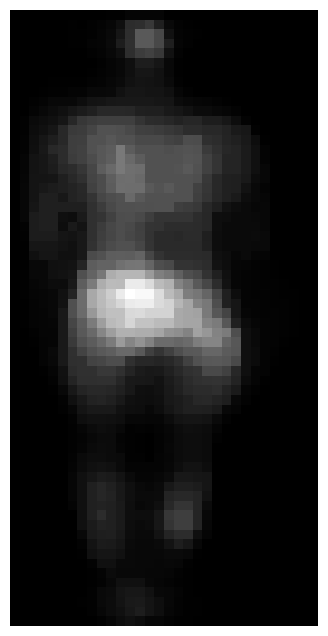

In [6]:
plt.figure(figsize=(5,8))
plt.imshow(img_frame)
plt.axis('off')
plt.savefig(f'pmat_f{frame_number}_orig.png')

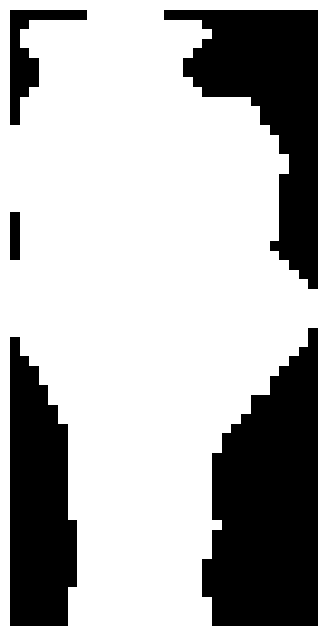

In [7]:
plt.figure(figsize=(5,8))
plt.imshow(img_bin)
plt.axis('off')
plt.savefig(f'pmat_f{frame_number}_bin.png')

In [8]:
pts_dict = {}

pts_dict['vert'] = ut.frames_medaxis(img_csv, dataset='PMat', axis=0)
pts_dict['horiz'] = ut.frames_medaxis(img_csv, dataset='PMat', axis=1)

100%|█████████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<00:00, 712.66it/s]


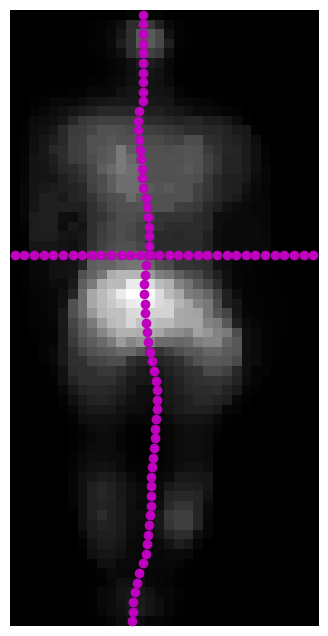

In [9]:
pts_vert = pts_dict['vert'][frame_number]
pts_horiz = pts_dict['horiz'][frame_number]

ut.plot_img_marks(img_frame, dots_v=pts_vert, dots_h=pts_horiz)
plt.savefig(f'pmat_f{frame_number}_division')

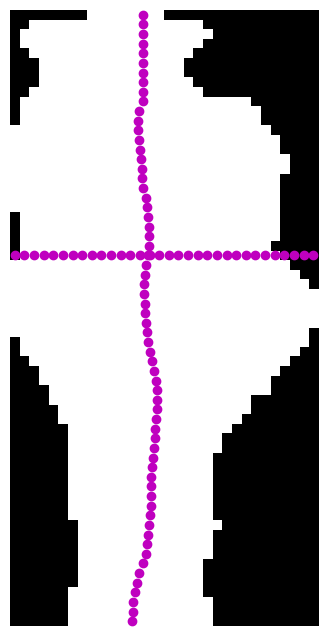

In [11]:
ut.plot_img_marks(img_bin, dots_v=pts_vert, dots_h=pts_horiz)
plt.savefig(f'pmat_f{frame_number}_bin_division')